# From Raw Data to Predictive Model: A Data Science Project


## Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

## Importing all the necessary Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Here we can see that our dataset has 1599 rows/records and 12 features or columns. All the features are of numerical type consisting of float and int data types. The quality is our target column i.e dependent variable where as other 11 columns are independent variables which are also know as features variables. They are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density,pH, sulphates, alcohol.

#### Descriptive Statistics Summary

In [7]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Data Preparation

### Checking for Missing values and NaN values



In [8]:
#checking for nan values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#check for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As, we can see that, their isn't any missing values or NaN values which can create problem in the model building phase. So, we don't need to handle them.

### Checking for duplicate values

In [10]:
wine.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [11]:
#removing the duplicate values form the dataset
wine.drop_duplicates(inplace = True)
wine.shape

(1359, 12)

We have removed 240 duplicated values from our orginal dataframe. Now, we have 1359 records and 12 features. Doing so, will reduce the redundent data problem for our model.

#### Outlier Handling:

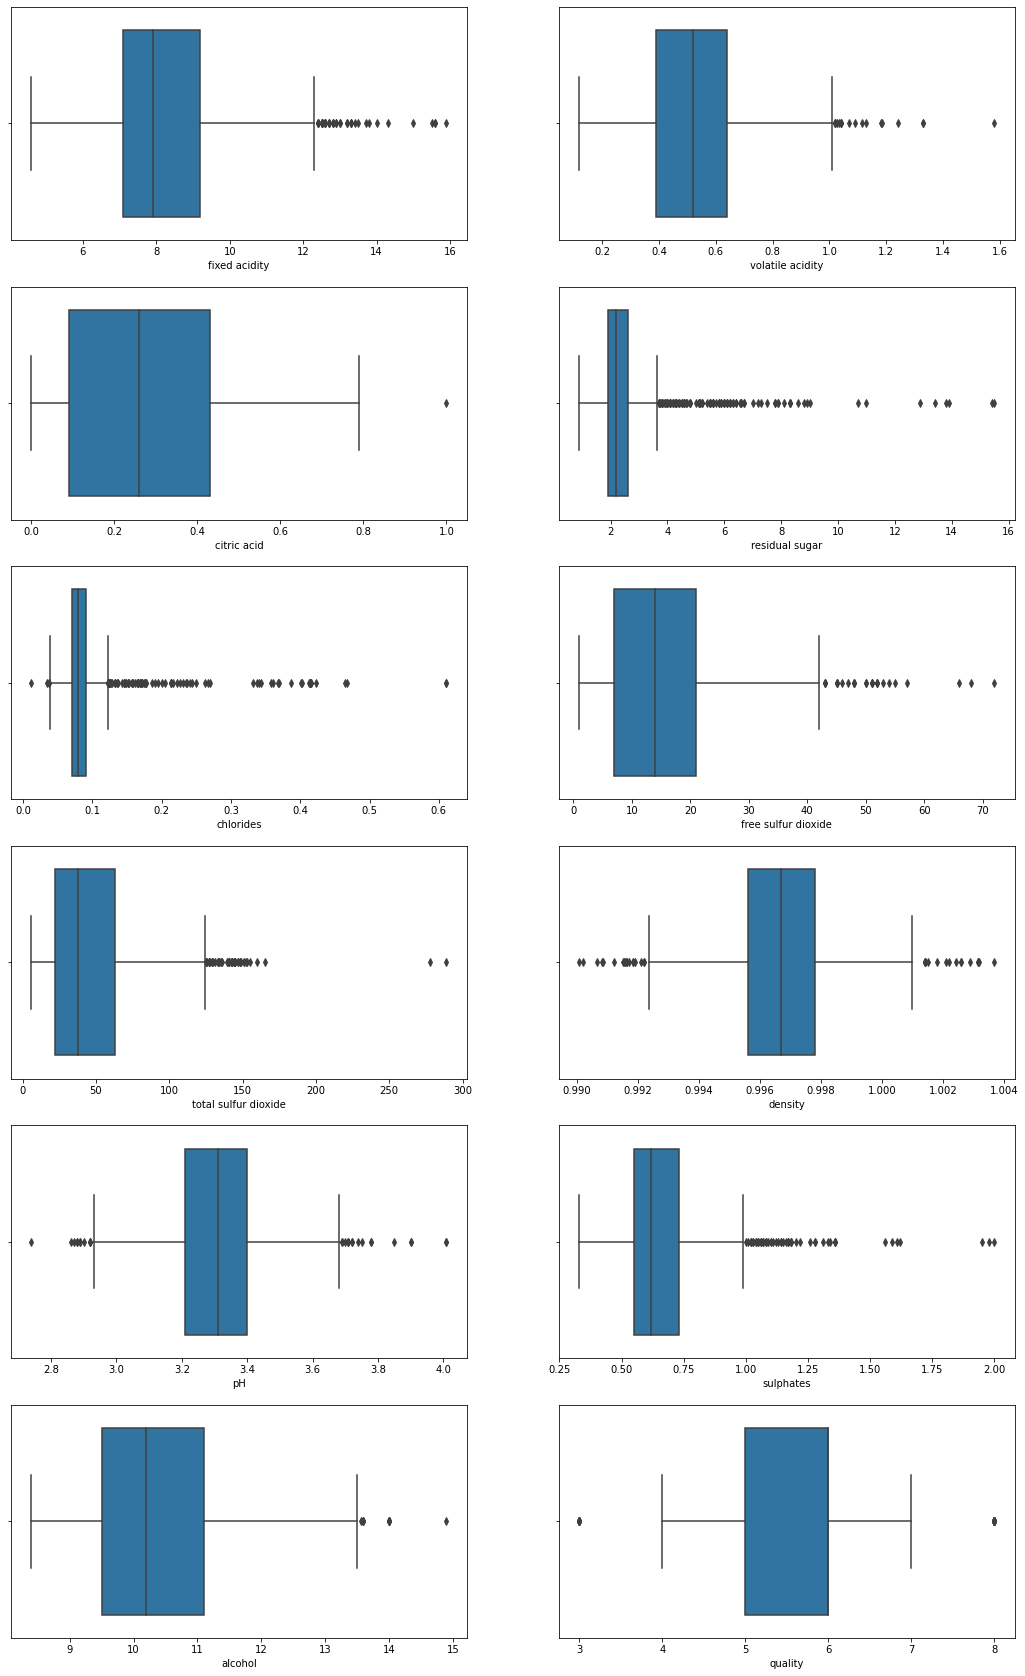

In [12]:
count = 0
wine_cols = wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data=wine,x = wine_cols[count],ax=ax[i][j])
        count +=1

So, we can see that, features like chlorides, residual sugar, sulphates has high no. of outliers. We can trim those outliers using the inter-quartile values but we will be loosing a lot our precious data which is not good. Rather than triming them with a specific value, we will be using the statistical approach and using the Z-score value. 

Here, we will not be taking the records which have z-score value of higher than 2.75. So, basically, we are only considering the data point which are 2.75 standard deviation away.

In [13]:
z=np.abs(zscore(wine))
threshold=2.75
np.where(z>threshold)

outlier_removed_wine=wine[(z<threshold).all(axis=1)].reset_index()
outlier_removed_wine.drop(['index'],axis=1,inplace=True)
outlier_removed_wine.shape

(1167, 12)

In [14]:
1359 - 1167    
# no. of records we lost

192

Box-plot after handeling of outliers.

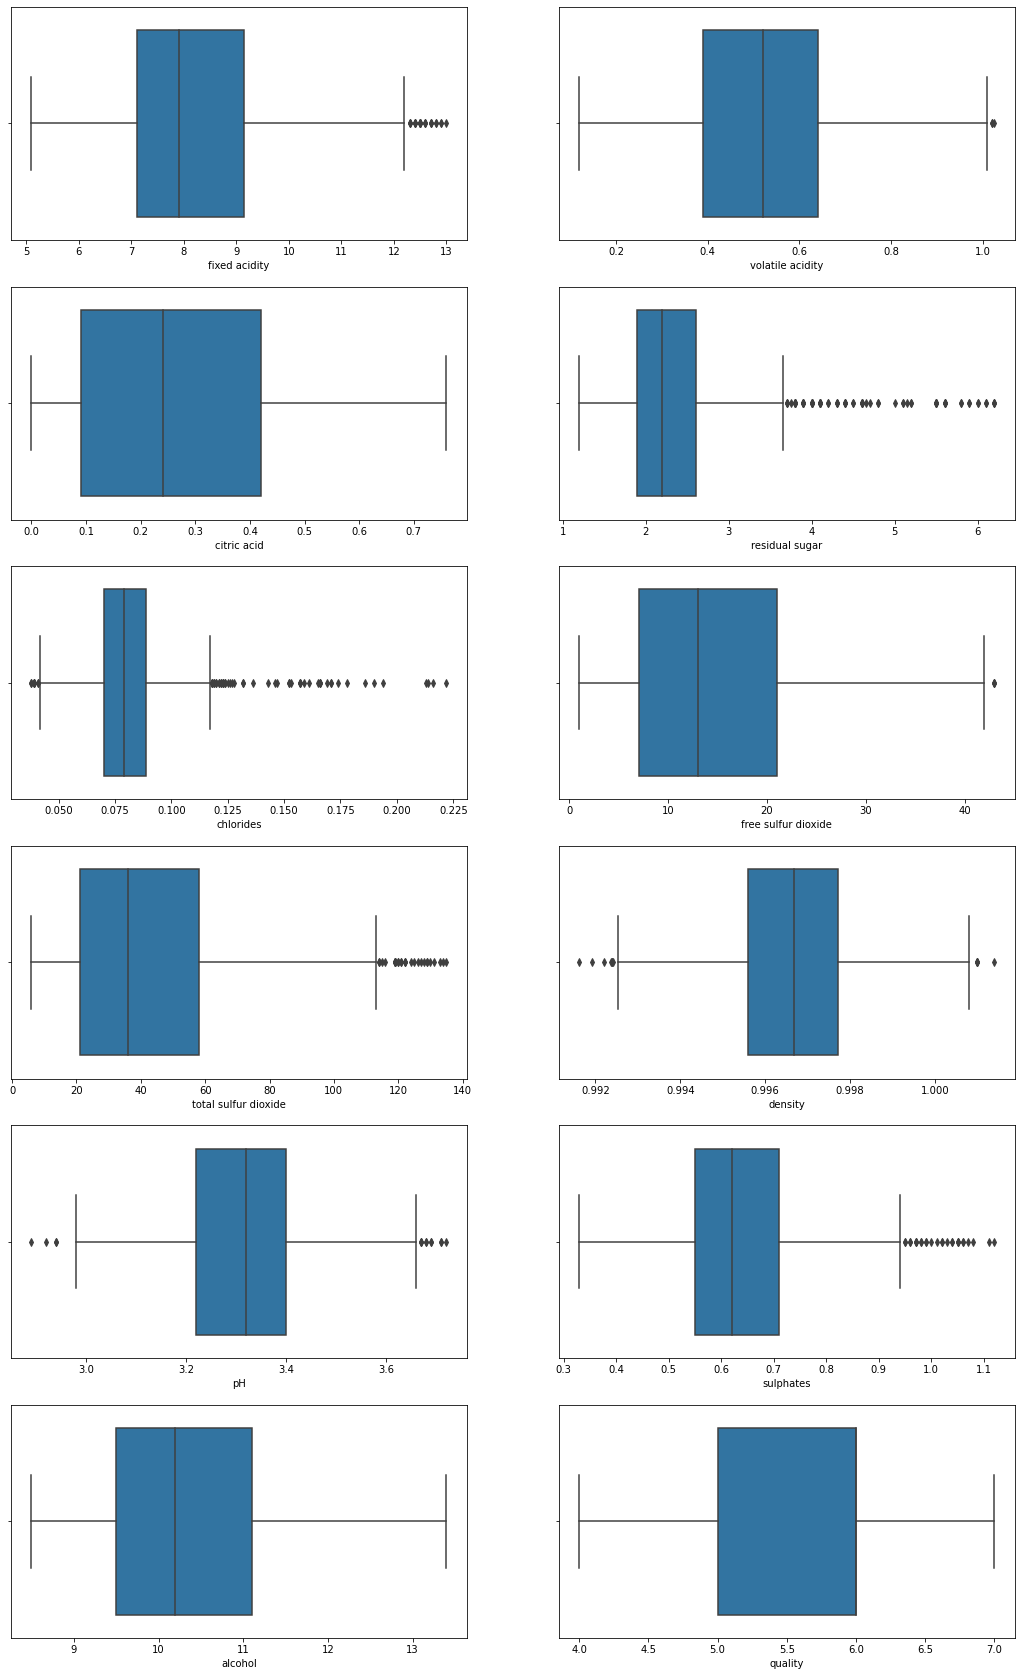

In [15]:
count = 0
wine_cols = wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(data=outlier_removed_wine,x = wine_cols[count],ax=ax[i][j])
        count +=1

Here, we can see that, most of the outliers are removed. There are some outliers present in the dataset, but they are ignored. We can also remove that by decreasing the z-score value but doing so will drastically reduce out records. Orginally we had 1599 records but after duplicate value and outliers removal we only have 1167 records. 

As, we have talked earlier, there is a trade-off between how many values we can take the outliers and how many records we are deleting from our data. 

The dataframe we have now is somewhat immune to outliers but not completely.

#### visualizing the quality    


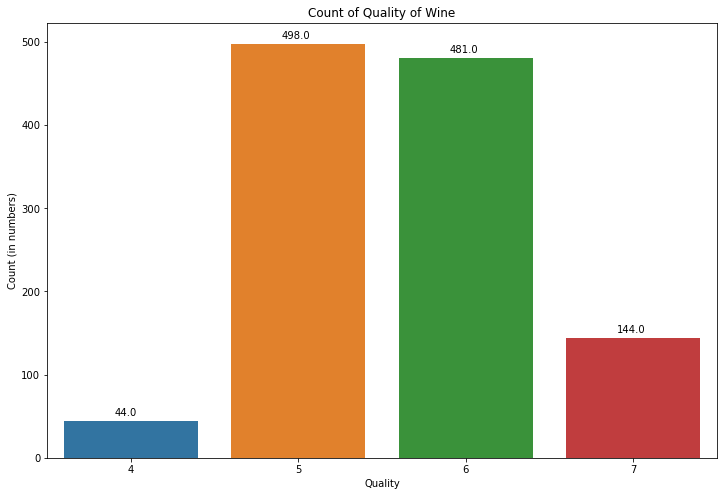

In [16]:
    
plt.figure(figsize=(12,8))
ax = sns.countplot(x='quality', data=outlier_removed_wine)
plt.title('Count of Quality of Wine')
plt.xlabel('Quality')
plt.ylabel('Count (in numbers)')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+6))

Here, we can see that, the 5 and 6 quality level wine are present most in the dataframe while 4 and 7 is present the least. And by the looks of it, the quality features is normally distributed. 

But, when we are building a model with this much variance between the target variable, the model might be biased amoung the 5 and 6. So, for handeling this problem we will be using a technique called SMOTE which in simple terms is known as over-sampeling. This will be done later on in the model building section.

#### Check the distribution of data using histograms

Here, after the removal of outliers, the most of the tailing should be removed. However, there might be some skewness amoung the data.

In [17]:
feature_columns = ['fixed acidity','volatile acidity', 'citric acid' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']


In [18]:
feature_df = outlier_removed_wine[feature_columns]
feature_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [19]:
target_df = outlier_removed_wine['quality']
target_df.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

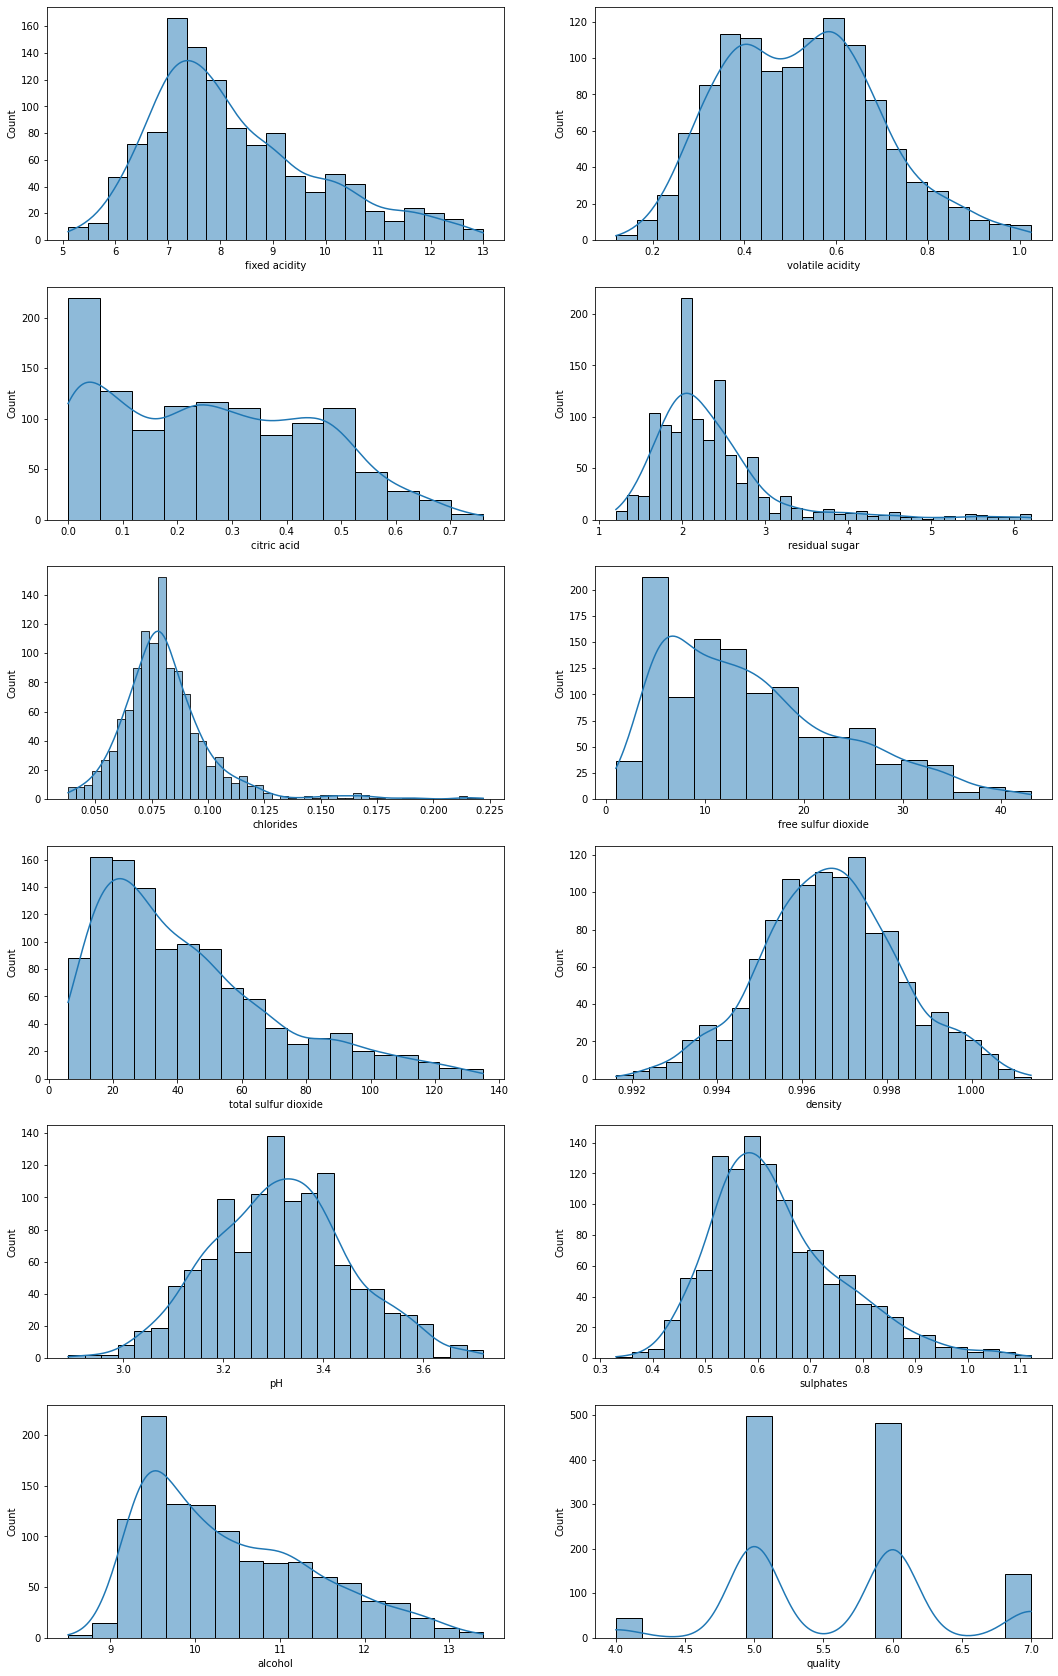

In [20]:
count = 0
wine_cols = wine.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=outlier_removed_wine,x = wine_cols[count],kde=True,ax=ax[i][j])
        count +=1

### Removing the Skewness and making the Dataframe as Normal as possible

In [21]:
outlier_removed_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [22]:
before = outlier_removed_wine.agg(['skew']).transpose()

In [23]:
before

,skew
fixed acidity,0.778241
volatile acidity,0.346303
citric acid,0.277507
residual sugar,2.272153
chlorides,2.125880
free sulfur dioxide,0.807824
total sulfur dioxide,1.060148
density,0.024120
pH,0.112692
sulphates,0.874863


In [24]:
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(feature_df)
feature_df=pd.DataFrame(X_power,columns=feature_df.columns)

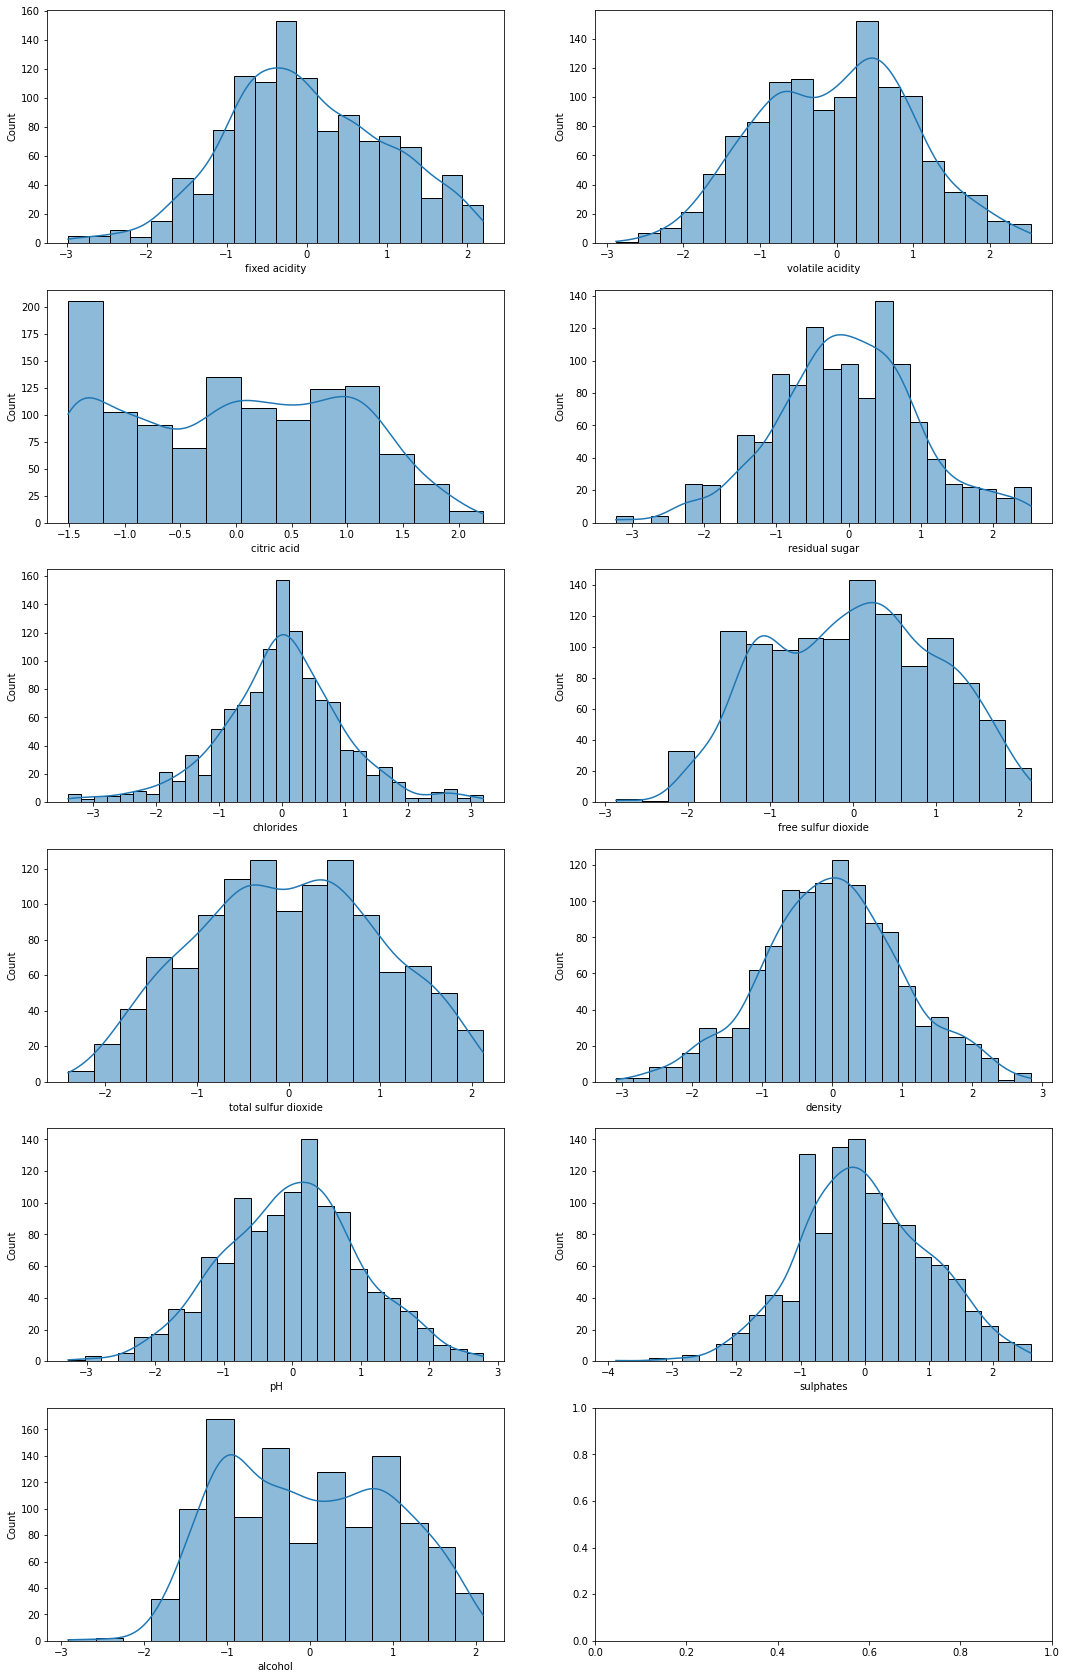

In [25]:
count = 0
wine_cols = feature_df.columns

fig, ax = plt.subplots(nrows=6, ncols=2,figsize=(18,30))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(data=feature_df,x = wine_cols[count],kde=True,ax=ax[i][j])
        count +=1
        if count == 11:
            break

In [26]:
after = feature_df.agg(['skew']).transpose()
after

,skew
fixed acidity,0.024988
volatile acidity,0.006065
citric acid,0.017911
residual sugar,-0.009058
chlorides,-0.106582
free sulfur dioxide,-0.024388
total sulfur dioxide,-0.011340
density,0.000031
pH,0.000379
sulphates,0.016157


In [27]:
skewness= pd.concat([after,before],axis=1)
skewness.set_axis(['After Transformation','Before Transformation'],axis=1,inplace=True)
skewness.fillna(0.199198)

,After Transformation,Before Transformation
fixed acidity,0.024988,0.778241
volatile acidity,0.006065,0.346303
citric acid,0.017911,0.277507
residual sugar,-0.009058,2.272153
chlorides,-0.106582,2.125880
free sulfur dioxide,-0.024388,0.807824
total sulfur dioxide,-0.011340,1.060148
density,0.000031,0.024120
pH,0.000379,0.112692
sulphates,0.016157,0.874863


The histograms are normalized and we have reduced the skewness to an acceptable range. 

### Feature Selection:

In [28]:
df= pd.concat([feature_df,target_df],axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.456163,1.047507,-1.508617,-0.617021,-0.144931,-0.244091,-0.063654,0.688228,1.386297,-0.576334,-1.112484,5
1,-0.152984,1.915393,-1.508617,0.663597,0.967374,1.121484,0.980814,0.084354,-0.833573,0.483750,-0.519342,5
2,-0.152984,1.349931,-1.228274,0.209613,0.703657,0.245749,0.641959,0.205365,-0.388162,0.247940,-0.519342,5
3,1.614999,-1.563540,1.478348,-0.617021,-0.206006,0.452427,0.806704,0.808648,-1.134980,-0.376360,-0.519342,6
4,-0.456163,0.837852,-1.508617,-0.878281,-0.206006,0.015776,0.180872,0.688228,1.386297,-0.576334,-1.112484,5


###  Correlation heatmap

<AxesSubplot:>

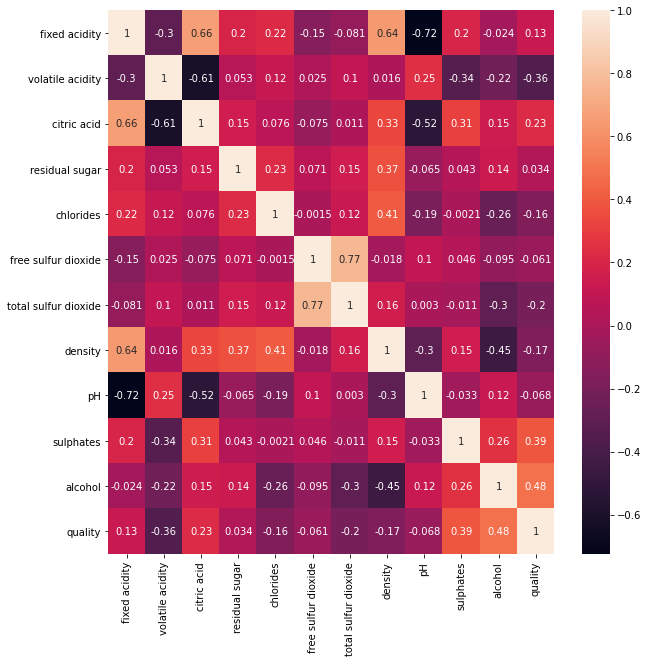

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

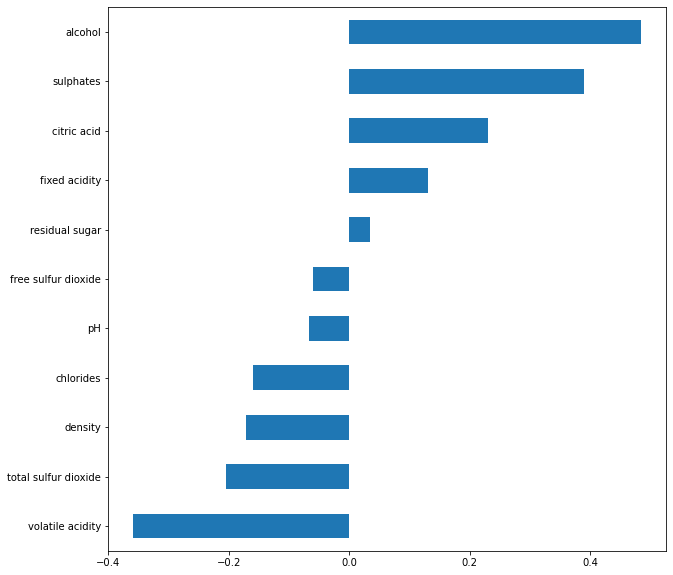

In [30]:
df.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (10,10))

For the coorealtion heat map we can see that, the features like fixed acidity, citric acid, suphates and alcohol are positively coorealted. Whereas, the features like volatile acidity, chlorides, density, total sulfur dioxide are negatively correlated with the quality. Now the features like residual sugar, free sulfur dioxide and pH has coorealtion near to 0. That means they donot have any significant important in our dataset and can be removed. 

Also, we can see that, our independent features are also highly correlated with each other. Like, the pH has very high negative corelation with volatile acidity whereas total sulfur dioxide and free sulfur dioxide are highly co-realted. 

So, after this analysis, we will be having 9 columns including the target columns

In [31]:
final_cols = ['fixed acidity','citric acid','sulphates','alcohol','volatile acidity','chlorides','density','total sulfur dioxide','quality']

In [32]:
final_df = df[final_cols]
final_df

,fixed acidity,citric acid,sulphates,alcohol,volatile acidity,chlorides,density,total sulfur dioxide,quality
0,-0.456163,-1.508617,-0.576334,-1.112484,1.047507,-0.144931,0.688228,-0.063654,5
1,-0.152984,-1.508617,0.483750,-0.519342,1.915393,0.967374,0.084354,0.980814,5
2,-0.152984,-1.228274,0.247940,-0.519342,1.349931,0.703657,0.205365,0.641959,5
3,1.614999,1.478348,-0.376360,-0.519342,-1.563540,-0.206006,0.808648,0.806704,6
4,-0.456163,-1.508617,-0.576334,-1.112484,0.837852,-0.206006,0.688228,0.180872,5
...,...,...,...,...,...,...,...,...,...
1162,-0.969864,-0.961717,1.385842,-0.954264,0.621339,-0.664037,-0.091323,0.103297,6
1163,-1.570116,-0.961717,-0.376360,0.303252,0.510386,0.609688,-1.071180,0.325982,5
1164,-1.909807,-0.833243,1.035046,0.922611,0.224706,-1.102894,-0.936831,0.553202,6
1165,-1.909807,-0.707794,0.702918,-0.020150,0.757485,-0.206006,-0.723391,0.325982,5


### Modeling

In [33]:
X = final_df.drop('quality', axis=1)
y = final_df['quality']

In [34]:
y.value_counts()


5    498
6    481
7    144
4     44
Name: quality, dtype: int64

### SMOTE

In [36]:
# adding samples to make allquality values same

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [37]:
y.value_counts()

4    498
5    498
6    498
7    498
Name: quality, dtype: int64

In [38]:
X.shape

(1992, 8)

In [39]:
y.shape

(1992,)

Here, we have successfully solved the data imbalance problem by increasing the data points of all the low occuring datapoints to 498. Now, it ensures that our machine learning model is not biased towards one target feature quantity. 

### Feature Scaling

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [41]:
X.shape

(1992, 8)

In [42]:
X.head()

,fixed acidity,citric acid,sulphates,alcohol,volatile acidity,chlorides,density,total sulfur dioxide
0,-0.457669,-1.422936,-0.536095,-1.191785,0.919463,-0.110457,0.770494,0.128397
1,-0.153476,-1.422936,0.489519,-0.611262,1.735580,1.040857,0.147246,1.194235
2,-0.153476,-1.149052,0.261377,-0.611262,1.203848,0.767891,0.272140,0.848447
3,1.620424,1.495223,-0.342624,-0.611262,-1.535837,-0.173674,0.894778,1.016562
4,-0.457669,-1.422936,-0.536095,-1.191785,0.722314,-0.173674,0.770494,0.377926


In [43]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=111)

In [45]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.7
0.15
0.15


### Cross-validation:

Here we are using cross-validation for linear regression model and random forest model and we will do hyperparameter tuning to get the optimal parameters.

In [47]:
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)

print("The average cross validation score for Linear Regression: ",scores_lr.mean())
print()
print("Cross validation scores:",scores_lr)

The average cross validation score for Linear Regression:  0.49049565338958023

Cross validation scores: [0.52516949 0.52128904 0.5155053  0.46306231 0.42745212]


In [48]:
rf = RandomForestRegressor()
scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

print("The average cross validation score for Random Forest: ",scores_rf.mean())
print()
print("Cross validation scores:",scores_rf)

The average cross validation score for Random Forest:  0.7588067446895624

Cross validation scores: [0.7888155  0.78533585 0.7571034  0.78401901 0.67875997]


### Fitting the Linear Regression Model

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
lr.score(X_val,y_val)

0.46035996071414176

### Hyper parameter optimization of Random Forest

In [51]:
def print_results(results):

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    print('Score: {} \n BEST PARAMS: {}\n'.format(results.best_score_,results.best_params_))

    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 2), round(std * 2, 2), params))

In [52]:
parameters = {
    'n_estimators': [5, 50, 250,300],
    'max_depth': [4, 8, 16, 32, None]
}

rf_model = GridSearchCV(rf, parameters, cv=5)
rf_model.fit(X_train, y_train.values.ravel())

print_results(rf_model)


Score: 0.7655421768962392 
 BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.56 (+/-0.07) for {'max_depth': 4, 'n_estimators': 5}
0.58 (+/-0.07) for {'max_depth': 4, 'n_estimators': 50}
0.57 (+/-0.06) for {'max_depth': 4, 'n_estimators': 250}
0.58 (+/-0.06) for {'max_depth': 4, 'n_estimators': 300}
0.66 (+/-0.09) for {'max_depth': 8, 'n_estimators': 5}
0.73 (+/-0.09) for {'max_depth': 8, 'n_estimators': 50}
0.73 (+/-0.08) for {'max_depth': 8, 'n_estimators': 250}
0.73 (+/-0.08) for {'max_depth': 8, 'n_estimators': 300}
0.71 (+/-0.09) for {'max_depth': 16, 'n_estimators': 5}
0.75 (+/-0.08) for {'max_depth': 16, 'n_estimators': 50}
0.76 (+/-0.08) for {'max_depth': 16, 'n_estimators': 250}
0.76 (+/-0.08) for {'max_depth': 16, 'n_estimators': 300}
0.7 (+/-0.06) for {'max_depth': 32, 'n_estimators': 5}
0.75 (+/-0.08) for {'max_depth': 32, 'n_estimators': 50}
0.77 (+/-0.08) for {'max_depth': 32, 'n_estimators': 250}
0.76 (+/-0.08) for {'max_depth': 32, 'n_estimators': 300}
0.7 (+/-0.11

Here, after hyper parameter optimization, we have increased the model accuracy even by a small amount. However, this will be enough for a long run.

In [53]:
rf = rf_model.best_estimator_

In [54]:
rf

RandomForestRegressor(max_depth=32, n_estimators=250)

In [55]:
rf.score(X_val,y_val)

0.7600458933740368

### Model Evaluation

### Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [56]:
def evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2 = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('RMSE:', rmse)
    print('R2:', r2)

**Linear Regression**

In [57]:
predict = lr.predict(X_val)
evaluate(y_val,predict)

MAE: 0.6729799172696898
RMSE: 0.8102210346522388
R2: 0.46035996071414176


**Random Forest Regressor**

In [58]:
predict = rf.predict(X_val)
evaluate(y_val,predict)

MAE: 0.4034916387959866
RMSE: 0.5402758121341891
R2: 0.7600458933740368


## Random forest model  

In [59]:
predict = rf.predict(X_test)
evaluate(y_test,predict)

MAE: 0.38032107023411366
RMSE: 0.5462790642643297
R2: 0.7638472624143609


### Conclusion



From the analysis, we found than between Linear Regression and Random Forest, Random Forest gave us the best result. The features which we selected from the co-realtion matrix to build the model seems to be working very nicely which is proven by the mutual information technique also. The removal of outliers, feature scaling, SMOTE transformation, reduction of skewness, hyperparameter tuning has also helped largely to make the model more accurate. 

The phytochemicals like Alcohol, volatile acidity, sulphates,total sulfur dioxide, fixed acidity, citric acid seems to have high impact on the analysis and which inturn have high impact on quality and the pricing strategy of each company's.

The limitation here might be in the dataset itself. There was less variation in the quality feature itself. As, the quality 5 and 6 were present in large amount compared to 4 and 7 which might lead to the biasness of the model. That we tried to remove using SMOTE but SMOTE only duplicates the data we have in the minority class which are not as meaningful like having a balanced classes with unique values.

Also, we were not able to completely remove the outliers present in our dataset due to limited amount of data we had which might be the reason for linear regression performing poorly compared to Random Forest which are robust to outliers. 

In future, we can implement regularization to improve the model accuracy along with that we can better prepare the data meaning we can implement concept like Homoscedacity, no multicollineariy to better fit the data in regression models. 

### Acknowledgement
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.